In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Color blind friendly palette  (https://gist.github.com/thriveth/8560036)
plt.style.use('tableau-colorblind10')  
plt.style.library['tableau-colorblind10'] 

RcParams({'axes.prop_cycle': cycler('color', ['#006BA4', '#FF800E', '#ABABAB', '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']),
          'patch.facecolor': '#006BA4'})

# DATA ANALYSIS. SURVEYS VOTES FOR GENDER

In this notebook, we conduct a detailed statistical analysis of the survey responses. Specifically, we explore the distributions and patterns of the three key thermal perception questions: Thermal Survey, Thermal Comfort and Walking Thermal Comfort. We use histograms and bar plots to visualize and explore how thermal perceptions vary across different sociodemographic groups of gender (men, women)

We use the dataset **all_surveys(votes).csv**: This dataset contains one row per vote (i.e., a TSV/TCV/wTCV response), along with the corresponding sociodemographic information of the respondent. Note: Since participants provided responses at multiple stops, individual participants may appear more than once.

*Note: we filter-out the responses of gender corresponding to non-binary and don't want to answer for simplicity and lack of statistics*


### INDEX

<br>

1. Socio-demographic statistics for GENDER: TCV, wTCV and TSV

        1.1. Gender general statistics
        
        1.2. Statistics for TCV, wTCV and TSV
        
        1.3. Histograms
        
        1.4. Horizontal bar-plots
   
       
        
        

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Read csv data (please, write the correct directory adress where the data is located in your computer)
stops = pd.read_csv('Data_Repository_Heat_Chronicles\\aggregated_surveys\\all_surveys(stops).csv')  # stops
all_votes_processed = pd.read_csv('Data_Repository_Heat_Chronicles\\aggregated_surveys\\all_surveys(votes).csv')  # votes
votes_ID = pd.read_csv('Data_Repository_Heat_Chronicles\\aggregated_surveys\\all_surveys(ID).csv')  # participants ID


plt.style.use('tableau-colorblind10')  # Color blind friendly palette  (https://gist.github.com/thriveth/8560036)
plt.style.library['tableau-colorblind10']  

RcParams({'axes.prop_cycle': cycler('color', ['#006BA4', '#FF800E', '#ABABAB', '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']),
          'patch.facecolor': '#006BA4'})

## 0. Read datasets

In [4]:
# Read csv data (please, write the correct directory adress where the data is located in your computer)
df_votes = pd.read_csv('Data_Repository_Heat_Chronicles\\aggregated_surveys\\all_surveys(votes).csv')  # votes

# Filter only man and woman (exclude non-binary and didn't want to answer)
df_votes_gender = df_votes.copy()
df_votes_gender = df_votes_gender[(df_votes_gender['gender'] == 'Man') | (df_votes_gender['gender']=='Woman')].reset_index(drop=True)

print('Number of original votes:', len(df_votes))
print('Number of votes excluding non-binary and don\'t want to answer:', len(df_votes_gender))

Number of original votes: 1867
Number of votes excluding non-binary and don't want to answer: 1795


<br>

## 1. Socio-demographic statistics for GENDER: TCV, wTCV and TSV

### 1.1. Gender general statistics

Number of men and women across the 1795 votes

gender
Woman    958
Man      837
Name: count, dtype: int64

gender
Woman    53.4
Man      46.6
Name: proportion, dtype: float64


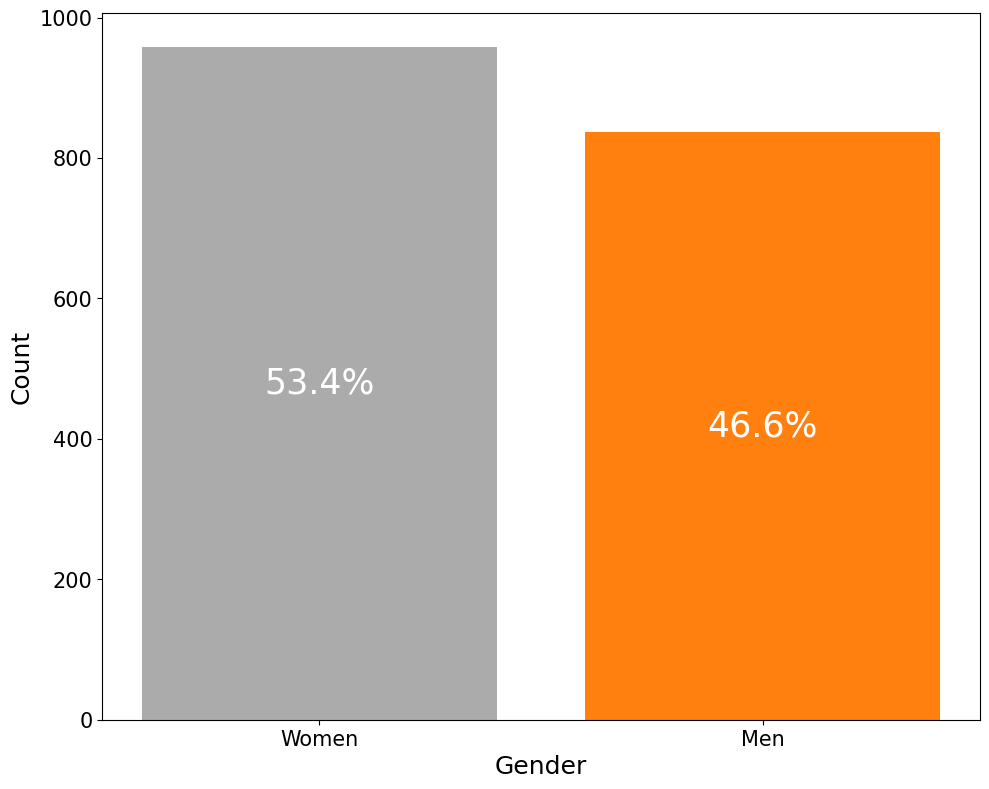

In [12]:
print(df_votes_gender['gender'].value_counts())
print('')

print(df_votes_gender['gender'].value_counts(normalize=True).mul(100).round(1))



# Count values
counts = df_votes_gender['gender'].value_counts()
total = counts.sum()

# Relabel tags for plotting
labels = ['Men' if gender == 'Man' else 'Women' for gender in counts.index]
percentages = [f'{(count/total)*100:.1f}%' for count in counts]
colors = ['#FF800E' if g == 'Man' else '#ABABAB' for g in counts.index]

# Create bar-plot
fig, ax = plt.subplots(figsize=(10,8))
bars = ax.bar(labels, counts, color=colors)

# Add percentages inside bars
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height/2, percent,
            ha='center', va='center', color='white', fontsize=25)

# x-y axis labels
ax.set_xlabel('Gender',fontsize=18)
ax.set_ylabel('Count',fontsize=18)

ax.tick_params(axis='both', labelsize=15)

plt.tight_layout()
plt.show()


### 1.2. Statistics for TCV, wTCV and TSV

In [13]:
columns = ['thermal_comfort', 'thermal_comfort_walking', 'thermal_sensation']

for column in columns:
    print('################')
    print(column)
    print('################')
    print('')
    for i,j in df_votes_gender.groupby(['gender']):
        
        if i[0]=='Woman':
            print('Women')
        else:
            print('Men')
            
        print('-------')
        
        #print(j[column].value_counts()) # Use this print for total number of votes
        print(j[column].value_counts(normalize=True).mul(100).round(1))   # Use this print for % (with 1 decimal)
        print('')
        
    print('')
    print('')
    

################
thermal_comfort
################

Men
-------
thermal_comfort
Neutral                   31.7
Comfortable               17.3
Slightly comfortable      16.4
Slightly uncomfortable    15.7
Uncomfortable              9.1
Very comfortable           5.9
Very uncomfortable         4.1
Name: proportion, dtype: float64

Women
-------
thermal_comfort
Neutral                   24.8
Comfortable               17.1
Slightly uncomfortable    17.0
Slightly comfortable      15.0
Uncomfortable             12.4
Very uncomfortable         7.3
Very comfortable           6.3
Name: proportion, dtype: float64



################
thermal_comfort_walking
################

Men
-------
thermal_comfort_walking
Neutral                   34.9
Slightly uncomfortable    22.0
Comfortable               12.3
Uncomfortable             10.9
Slightly comfortable      10.1
Very uncomfortable         6.1
Very comfortable           3.7
Name: proportion, dtype: float64

Women
-------
thermal_comfort_walking
Neu

### 1.3. Histograms

The histograms are normalized such as the votes for each "answer" sum 1. In this way, this histogram is useful to compare a given socio-dem category (for example, men and women) in a given (individual) answer of the survey. 

For example: if we analyze the answer "Very uncomfortable" from the "Thermal comfort" histogram, we'll see how many votes correspond to men and how many to women. In other words, "If I vote this answer of thermal comfort, what is the probability that I'm a man or a woman?"

Note that this normalization does not allow us to compare the whole distribution (tendency) of votes, we use the horitzontal bar-plots for this purpose).



In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def grouped_histogram(df, response_col, group_col, category_order, group_palette=None, hue_order=None,
                      xlabel=None, ylabel='Probability', legend_title=None, group_labels=None, figsize=(1.5, 5)):
    '''
    Plots a grouped bar chart showing the normalized distribution of a categorical response variable
    (e.g., thermal comfort) across different groups (e.g., gender).

    Parameters:
        df (pd.DataFrame): The input DataFrame containing both the response and group columns.
        response_col (str): Name of the column containing the survey responses (e.g., 'thermal_comfort').
        group_col (str): Name of the grouping column (e.g., 'gender').
        category_order (list): Ordered list of response categories for the x-axis.
        group_palette (list or dict): Custom color palette for the groups.
        hue_order (list): Specific order of group values (e.g., ['Man', 'Woman']).
        xlabel (str): Label for the x-axis. If None, uses `response_col`.
        ylabel (str): Label for the y-axis.
        legend_title (str): Title for the legend (hue).
        group_labels (list): Replacement labels for the legend (e.g., ['Men', 'Women']).
        figsize (tuple): Aspect and height of the figure (aspect, height).
    
    Returns:
        None. Displays the plot directly.
    '''

    # Normalize counts (grouped by response and group column)
    df_norm = df.groupby(response_col)[group_col].value_counts(normalize=True).rename('proportion').reset_index()

    # Ensure correct order of the response categories
    df_norm[response_col] = pd.Categorical(df_norm[response_col], categories=category_order, ordered=True)
    df_norm.sort_values(by=response_col, inplace=True)

    # Plot
    aspect, height = figsize
    g = sns.catplot(
        x=response_col,
        y='proportion',
        hue=group_col,
        kind='bar',
        data=df_norm,
        palette=group_palette,
        hue_order=hue_order,
        alpha=1.0,
        width=0.6,
        height=height,
        aspect=aspect
    )

    # Format axis labels and ticks
    g.set_xticklabels(category_order, rotation=30, fontsize=11)
    plt.yticks(fontsize=11)
    g.set_axis_labels(xlabel or response_col, ylabel, fontsize=13)

    # Legend title
    if legend_title:
        g._legend.set_title(legend_title)

    # Replace legend labels if provided
    if group_labels:
        for t, new_label in zip(g._legend.texts, group_labels):
            t.set_text(new_label)

    plt.show()


Thermal comfort TCV


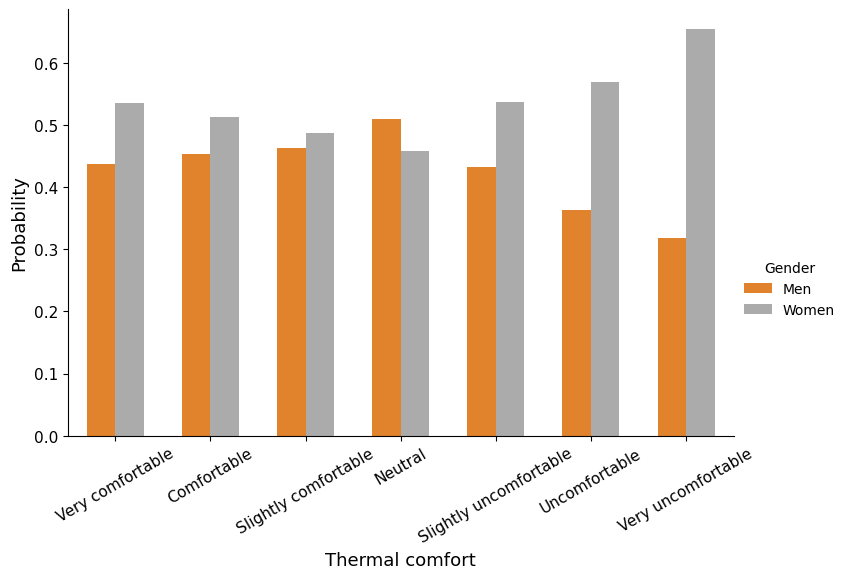

Walking thermal comfort wTCV


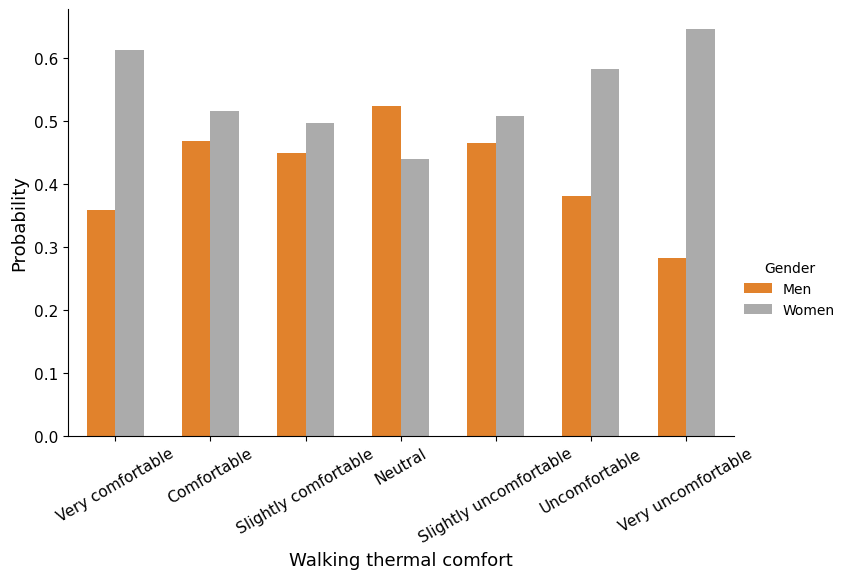

Thermal sensation TSV


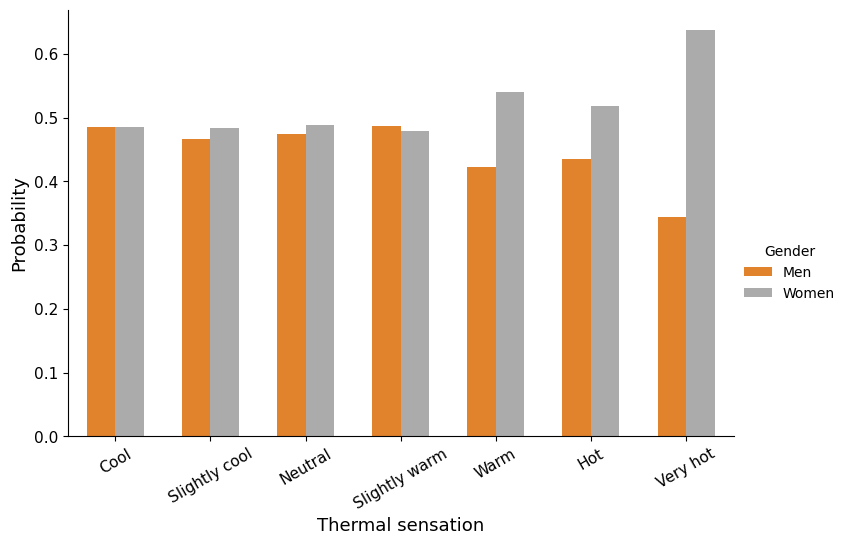

In [26]:
categories_TCV_and_wTCV = ['Very comfortable','Comfortable','Slightly comfortable','Neutral','Slightly uncomfortable',
                           'Uncomfortable','Very uncomfortable']


categories_TSV = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']


# HISTOGRAM THERMAL COMFORT
print('Thermal comfort TCV')
grouped_histogram(df = df_votes, response_col = 'thermal_comfort',group_col = 'gender', category_order = categories_TCV_and_wTCV, 
                  group_palette=["#FF800E", "#ABABAB"], hue_order=['Man','Woman'], xlabel='Thermal comfort',
                  legend_title = 'Gender', group_labels = ['Men', 'Women']) 

# HISTOGRAM WALKING THERMAL COMFORT
print('Walking thermal comfort wTCV')
grouped_histogram(df = df_votes, response_col = 'thermal_comfort_walking',group_col = 'gender', category_order = categories_TCV_and_wTCV, 
                  group_palette=["#FF800E", "#ABABAB"], hue_order=['Man','Woman'], xlabel='Walking thermal comfort',
                  legend_title = 'Gender', group_labels = ['Men', 'Women']) 

# HISTOGRAM THERMAL SENSATION
print('Thermal sensation TSV')
grouped_histogram(df = df_votes, response_col = 'thermal_sensation',group_col = 'gender', category_order = categories_TSV, 
                  group_palette=["#FF800E", "#ABABAB"], hue_order=['Man','Woman'], xlabel='Thermal sensation',
                  legend_title = 'Gender', group_labels = ['Men', 'Women']) 

### 1.4. Horizontal bar-plots

In [33]:
def survey_plot(results, category_names, column_name=None):
    '''
    Plots a horizontal stacked bar chart showing the percentage distribution of responses across ordered categories.
    Special styling is applied for specific cases like 'thermal_sensation'.

    Parameters:
        results (dict): Keys are group labels (e.g., 'All', 'Women', 'Men'), 
                        values are lists of counts per category (must match category_names length).
        category_names (list): Ordered list of category labels (e.g., from cool to hot).
        column_name (str, optional): If set to 'thermal_sensation', applies specific color customizations.

    Returns:
        fig, ax: The matplotlib Figure and Axes objects.
    '''

    labels = list(results.keys())
    data = np.array(list(results.values()))  # Shape: (n_groups, n_categories)

    # Convert to percentages
    total_votes = data.sum(axis=1)
    percentages = ((data.T / total_votes) * 100).T
    cumulative = percentages.cumsum(axis=1)

    # Define color palette
    category_colors = plt.colormaps['RdYlGn_r'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(11, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, 100)

    for i, (label, color) in enumerate(zip(category_names, category_colors)):
        # Optional color override for thermal_sensation
        if column_name == 'thermal_sensation':
            if i == 2:  # Neutral category (index 2)
                color = category_colors[3]
            elif i == 3:
                color = np.array([0.98746328, 0.9067397, 0.65926182, 1.])  # Light beige

        widths = percentages[:, i]
        starts = cumulative[:, i] - widths

        rects = ax.barh(labels, widths, left=starts, height=0.75, label=label, color=color)

        for j, rect in enumerate(rects):
            if widths[j] > 2:  # Only show text if the bar segment is visible
                ax.text(
                    rect.get_x() + rect.get_width() / 2,
                    rect.get_y() + rect.get_height() / 2,
                    f'{int(round(widths[j]))}%',
                    ha='center', va='center', fontsize=11, color='black'
                )

        # Add 1–7 scale below bar (only once for the first row)
        if len(labels) == 1:
            if i == 0:
                center = cumulative[0][i] / 2
            else:
                center = cumulative[0][i - 1] + (widths[0] / 2)
            ax.text(center, 0.7, str(i + 1), fontsize=11, ha='center')

    # Add quartile lines
    for x in [25, 50, 75]:
        ax.axvline(x, ymin=0.05, ymax=0.95, color='black', linestyle='--', linewidth=1, alpha=0.3)

    # Clean up axes
    ax.tick_params(labelsize=14)
    #for spine in ['top', 'bottom', 'left', 'right']:
        #ax.spines[spine].set_visible(False)

    return fig, ax


Thermal comfort TCV


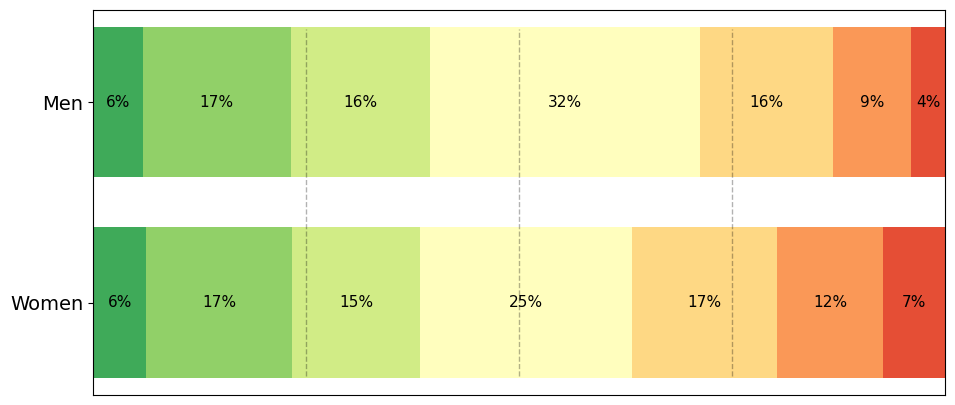

Walking thermal wTCV


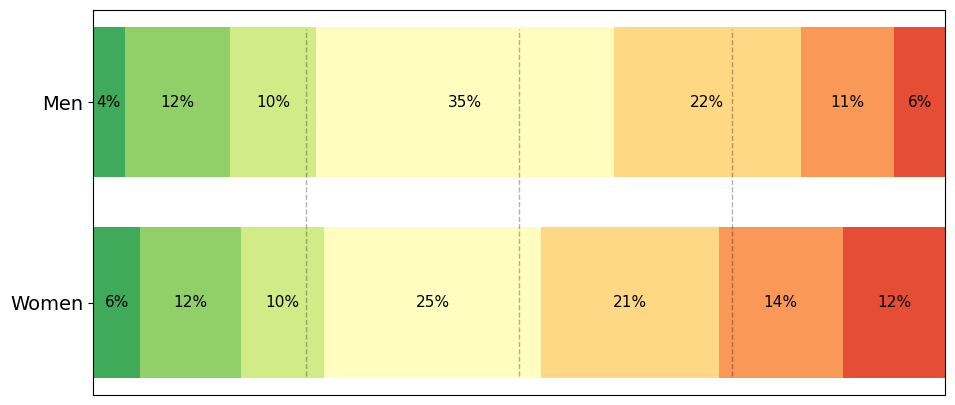

Thermal sensation TSV


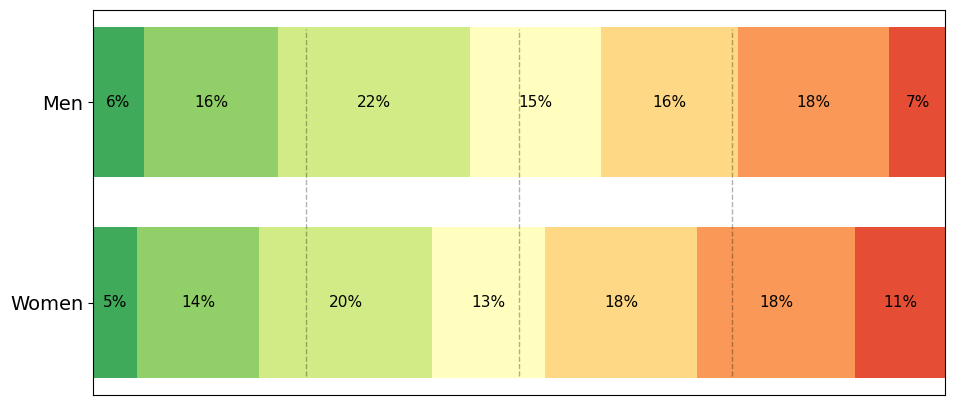

In [34]:
categories_TCV_and_wTCV = ['Very comfortable','Comfortable','Slightly comfortable','Neutral','Slightly uncomfortable',
                           'Uncomfortable','Very uncomfortable']

categories_TSV = ['Cool', 'Slightly cool', 'Neutral', 'Slightly warm','Warm','Hot','Very hot']


def count_responses_for_gender(df, name_column, name_group, order_list):
    result = {}

    # Personalized tags for the gender
    tags_gender = {"Man": "Men", "Woman": "Women"}
    
    # Count by gender
    for gender, tags in tags_gender.items():
        filtered = df[df[name_group] == gender]
        counts = filtered[name_column].value_counts().reindex(order_list, fill_value=0)
        result[tags] = counts.tolist()

    return result


# BAR-PLOT THERMAL COMFORT
print('Thermal comfort TCV')
results_gender_TCV = count_responses_for_gender(df_votes_gender, 'thermal_comfort', 'gender', categories_TCV_and_wTCV )
fig, ax = survey_plot(results_gender_TCV, categories_TCV_and_wTCV)  # Plot
plt.show()

# BAR-PLOT THERMAL COMFORT
print('Walking thermal wTCV')
results_gender_wTCV = count_responses_for_gender(df_votes_gender, 'thermal_comfort_walking', 'gender', categories_TCV_and_wTCV )
fig, ax = survey_plot(results_gender_wTCV, categories_TCV_and_wTCV)  # Plot
plt.show()

# BAR-PLOT THERMAL COMFORT
print('Thermal sensation TSV')
results_gender_TSV = count_responses_for_gender(df_votes_gender, 'thermal_sensation', 'gender', categories_TSV )
fig, ax = survey_plot(results_gender_TSV, categories_TSV)  # Plot
plt.show()
